### 2D 보기

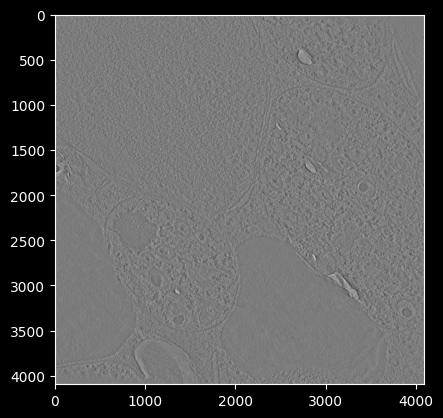

In [1]:
import mrcfile
import matplotlib.pyplot as plt

with mrcfile.open('EMPIAR-10227/20190123_03.rec') as mrc:
    data = mrc.data

plt.imshow(data[data.shape[0]//2], cmap='gray')
plt.show()

### 3D 보기

In [4]:
import mrcfile
import napari

with mrcfile.open("EMPIAR-10227/20190123_03.rec") as m:
    data = m.data

viewer = napari.view_image(data, rendering='mip')
napari.run()

### 가우시안 Smoothing (큰 구조만 남기기)

In [7]:
import mrcfile
import napari
from scipy.ndimage import gaussian_filter

# 1. Cryo-ET tomogram 로드
with mrcfile.open("EMPIAR-10227/20190123_03.rec") as m:
    data = m.data

# 2. napari viewer 생성 + 원본 이미지 추가
viewer = napari.view_image(data, name="raw", rendering="mip")   # mip -> 3D view에서만 의미 있음

# 3. smoothing (큰 구조만 남기기)
smoothed = gaussian_filter(data, sigma=2)

# 4. smoothing 결과를 새 레이어로 추가
viewer.add_image(smoothed, name="smoothed", opacity=0.7)

napari.run()